### Matriz de Puntuaciones(Semana 1)

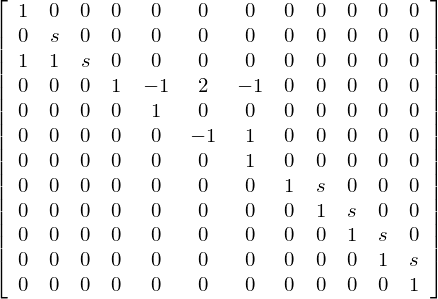

In [44]:
from sympy import symbols, Matrix, init_printing

"""
A1: matriz de puntuaciones en la primera practica de tiros.
A1(i,j): puntuación del tiro j-esimo sobre la i-esima diana
s: bonificación por tirar en la diana
"""

s = symbols('s')

A = Matrix([
[1,  0,  0, 0,  0,  0,  0, 0,  0,  0,   0,   0],
[0, s,  0, 0,  0,  0,  0, 0,  0,  0,   0,   0],
[1,  1, s, 0,  0,  0,  0, 0,  0,  0,   0,   0],
[0,  0,  0, 1, -1,  2, -1, 0,  0,  0,   0,   0],
[0,  0,  0, 0,  1,  0,  0, 0,  0,  0,   0,   0],
[0,  0,  0, 0,  0, -1,  1, 0,  0,  0,   0,   0],
[0,  0,  0, 0,  0,  0,  1, 0,  0,  0,   0,   0],
[0,  0,  0, 0,  0,  0,  0, 1, s,  0,   0,   0],
[0,  0,  0, 0,  0,  0,  0, 0,  1, s,   0,   0],
[0,  0,  0, 0,  0,  0,  0, 0,  0,  1, s,   0],
[0,  0,  0, 0,  0,  0,  0, 0,  0,  0,   1, s],
[0,  0,  0, 0,  0,  0,  0, 0,  0,  0,   0,   1]])


init_printing()
A

### Cálculo de la forma de jordan y de la matriz de permutación (Sympy)

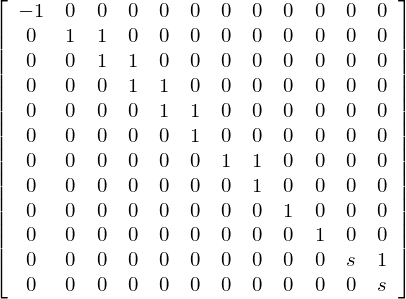

In [43]:
"""
Cálculo de la matriz de jordan y de la matriz de cambio de base
"""

P, J = A.jordan_form()
J

### Cálculo de la potencia k-esima de A mediante la relacion:

$$A^{k} = P J^{k}P^{-1}$$

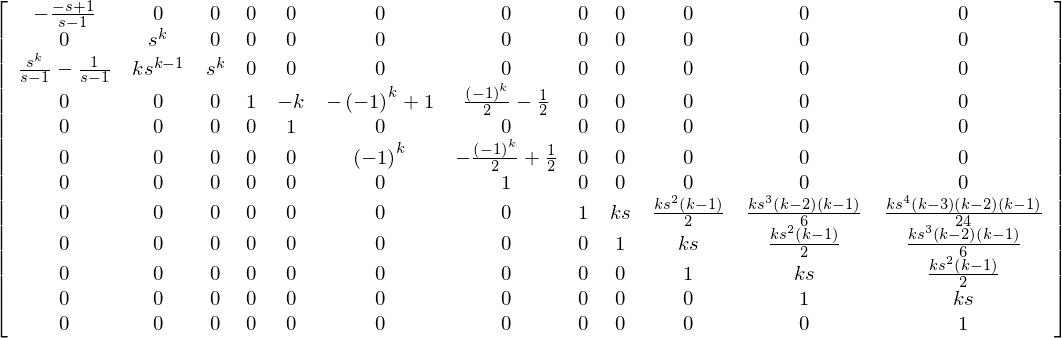

In [45]:
"""
Cálculo de la potencoa k-esima de la matriz A, mediante la matriz de jordan.

A**k = P*JK*P**(-1)

Donde:
Pk: Potencia k-esima de la matriz de jordan de A
Ak: Potencia k-esima de la matriz de jordan de A
"""
k = symbols('k')
JK = J**k

AK = P*JK*P**(-1)

AK

# Cálculo de la matriz de puntajes (semana k) 

In [48]:
"""
Evaluacion de simbolos
s: bonificación por tirar en la diana
"""

from sympy import symbols, init_printing
import scipy.linalg as sl
import numpy as np


def power_jordan(A):
    k = symbols('k')
    P, J = A.jordan_form()
    JK = J**k
    AK = P*JK*P**(-1)

    return AK


def puntaje_k(A, s0, k0):
    puntk = power_jordan(A)
    return puntk.evalf(subs={s:s0, k:k0}) # Matriz de puntajes semana k0
    
def print_matrix(A):
    nrow = np.shape(A)[0]
    for k in range(nrow):
        print("{}".format(A[k,:]))
    
    
    

s0 = float(input("Valor de la bonificación por tirar en la diana: "))
k0 = int(input("Ingrese la semana,para calcular sus puntajes: "))

while s0 < 0 or s0 == 1 or k0 < 0:
    print("Por favor ingrese valores correctos: ")
    s0 = float(input("Valor de la bonificación por tirar en la diana: "))
    k0 = int(input("Ingrese la semana,para calcular sus puntajes: "))


Ak = puntaje_k(A, s0, k0)

punt_inf = sl.norm(Ak, np.inf)
punt_1 = sl.norm(Ak, 1)

init_printing()
print("*********************Matriz de puntajes(semana {})*********************".format(k0))
print_matrix(Ak)
print("\n\nPuntuación con norma infinito:\t{}\nPuntuación con norma 1:\t{}".format(punt_inf, punt_1))


Valor de la bonificación por tirar en la diana: 2
Ingrese la semana,para calcular sus puntajes: 2
*********************Matriz de puntajes(semana 2)*********************
Matrix([[1.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
Matrix([[0, 4.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
Matrix([[3.00000000000000, 4.00000000000000, 4.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
Matrix([[0, 0, 0, 1.00000000000000, -2.00000000000000, 0.e-125, 0.e-125, 0, 0, 0, 0, 0]])
Matrix([[0, 0, 0, 0, 1.00000000000000, 0, 0, 0, 0, 0, 0, 0]])
Matrix([[0, 0, 0, 0, 0, 1.00000000000000, 0.e-125, 0, 0, 0, 0, 0]])
Matrix([[0, 0, 0, 0, 0, 0, 1.00000000000000, 0, 0, 0, 0, 0]])
Matrix([[0, 0, 0, 0, 0, 0, 0, 1.00000000000000, 4.00000000000000, 4.00000000000000, 0.e-125, -0.e-127]])
Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 1.00000000000000, 4.00000000000000, 4.00000000000000, 0.e-125]])
Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1.00000000000000, 4.00000000000000, 4.00000000000000]])
Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,